# Global indicator project - Phoenix, Arizona
This notebook descript the process to get street networks from OpenStreetMap using OSMnx, a Python library that lets you download spatial geometries and construct, project, and visualize street networks from OpenStreetMap's API. This process downloads spatial "place boundary" geometries and street network data from OpenStreetMap, save them to local data folder.

## OSM street network
Using OpenStreetMap as a source for 
* place boundary
* complete road network
* a pedestrian 'walk' network
* a cycle lane 'bike' network
* calculating street network stats
* calculating intersection density for the pedestrian network


In [1]:
# Libraries used for OSMnx analyses and output
import networkx as nx
import time 
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
import requests
import fiona
import pandas as pd
import geopandas as gpd

from descartes import PolygonPatch
from shapely.geometry import shape,Point, LineString, Polygon

import config

ox.config(use_cache=True, log_console=True)
ox.__version__

'0.9'

In [2]:
suffix = '_201905'

places = ['Phoenix, Arizona, USA']

## Get place boundary

In [3]:
def get_studyregion_gdf(address):
    gdf = ox.gdf_from_place(address)
    ox.save_gdf_shapefile(gdf, filename='{studyregion}_shape{suffix}'.format(studyregion = address,
                                                                                   suffix = suffix), folder='../data/OSM')
    return gdf

In [4]:
def get_bufferedstudyregion_gdf(address):
    gdf = ox.gdf_from_place(address, buffer_dist=1e4)
    ox.save_gdf_shapefile(gdf, filename='{studyregion}_buffered{suffix}'.format(studyregion = address,
                                                                                   suffix = suffix), folder='../data/OSM')
    return gdf


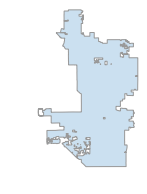

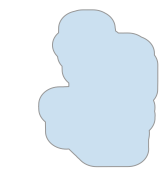

In [5]:
for address in places:
    studyregion = get_studyregion_gdf(address)
    studyregion_buffer = get_bufferedstudyregion_gdf(address)
    ox.plot_shape(studyregion, figsize=(3,3))
    ox.plot_shape(studyregion_buffer, figsize=(3,3))

## Get complete street network and pedestrain network

In [22]:
# Extract complete OSM network: "all (non-private) OSM streets and paths"

def get_OSM_G_all(address):    
    G_all = ox.graph_from_place(address, network_type= 'all', retain_all = True, buffer_dist=1e4)
    ox.save_graphml(G_all, filename='{studyregion}_all{suffix}.graphml'.format(studyregion = address,
                                                                                   suffix = suffix), folder='../data/OSM')
    G_all_proj = ox.project_graph(G_all)
    G_proj_gdfs = ox.graph_to_gdfs(G_all_proj, nodes=False, edges=True, fill_edge_geometry=True)
    
    #show network figure
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = G_proj_gdfs.plot(ax=ax)
    ax.set_title(address)
    ax.set_axis_off()
    fig.suptitle('All OSM street network', fontsize=14, fontweight='bold')
    fig.text(0.1, 0, 'Note: all non-private street network')
    plt.show()



In [ ]:
# Extract pedestrain OSM network
def get_OSM_G_walk(address): 
    G_walk = ox.graph_from_place(address, network_type= 'walk', retain_all=True, buffer_dist=1e4)
    ox.save_graphml(G_walk, filename='{studyregion}_walk{suffix}.graphml'.format(studyregion = address,
                                                                                   suffix = suffix), folder='../data/OSM')
    
    G_walk_proj = ox.project_graph(G_walk)
    G_proj_gdfs = ox.graph_to_gdfs(G_walk_proj, nodes=False, edges=True, fill_edge_geometry=True)
    
    #show network figure
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = G_proj_gdfs.plot(ax=ax)
    ax.set_title(address)
    ax.set_axis_off()
    fig.suptitle('All OSM pedestrain network', fontsize=14, fontweight='bold')
    fig.text(0.1, 0, 'Note: based on OSMnx walk network type')
    plt.show()



In [ ]:
# Extract cycle OSM network
def get_OSM_G_bike(address):
    G_bike = ox.graph_from_place(address, network_type= 'bike', retain_all=True, buffer_dist=1e4)
    ox.save_graphml(G_bike, filename='{studyregion}_bike{suffix}.graphml'.format(studyregion = address,
                                                                                   suffix = suffix), folder='../data/OSM')
    
    G_walk_proj = ox.project_graph(G_walk)
    G_proj_gdfs = ox.graph_to_gdfs(G_walk_proj, nodes=False, edges=True, fill_edge_geometry=True)
    
    #show network figure
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = G_proj_gdfs.plot(ax=ax)
    ax.set_title(address)
    ax.set_axis_off()
    fig.suptitle('All OSM bike network', fontsize=14, fontweight='bold')
    fig.text(0.1, 0, 'Note: based on OSMnx bike network type')
    plt.show()

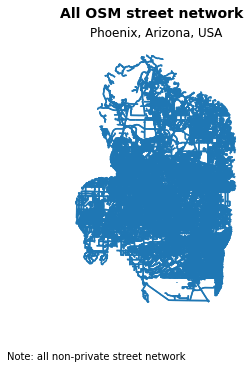

In [ ]:
for address in places:
    get_OSM_G_all(address)

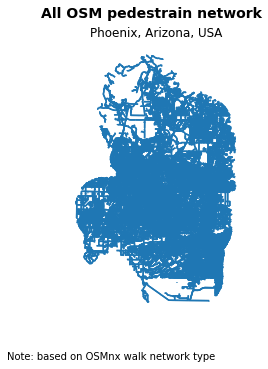

In [ ]:
for address in places:
    get_OSM_G_walk(address)

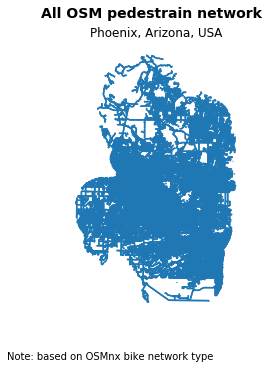

In [ ]:
for address in places:
    get_OSM_G_bike(address)